In [58]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r'D:\Superstore.xlsx')

In [4]:
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment Section,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6062,4756,ES-2015-5608714,2015-09-19,2015-09-23,Standard Class,CC-12685,Craig Carroll,Consumer,Dudley,England,United Kingdom,North,TEC-MA-10004896,Office Supplies,Machines,"StarTech Phone, White",72.93,1,0.0,29.88
6820,7044,ES-2018-1367750,2018-11-29,2018-12-03,Standard Class,EB-13750,Edward Becker,Corporate,Oslo,Oslo,Norway,North,TEC-PH-10004635,Office Supplies,Phones,"Samsung Office Telephone, with Caller ID",391.32,6,0.0,90.00


In [5]:
df.shape

(10000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           10000 non-null  int64         
 1   Order ID         10000 non-null  object        
 2   Order Date       10000 non-null  datetime64[ns]
 3   Ship Date        10000 non-null  datetime64[ns]
 4   Ship Mode        10000 non-null  object        
 5   Customer ID      10000 non-null  object        
 6   Customer Name    10000 non-null  object        
 7   Segment Section  10000 non-null  object        
 8   City             10000 non-null  object        
 9   State            10000 non-null  object        
 10  Country          10000 non-null  object        
 11  Region           10000 non-null  object        
 12  Product ID       10000 non-null  object        
 13  Category         10000 non-null  object        
 14  Sub-Category     9999 non-null   object

# Perform EDA Operations


In [7]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment Section    0
City               0
State              0
Country            0
Region             0
Product ID         0
Category           0
Sub-Category       1
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [8]:
mode_value=df['Sub-Category'].mode()
print(mode_value)


0    Art
Name: Sub-Category, dtype: object


In [9]:
df['Sub-Category'].fillna('Art',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10200\4118043401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sub-Category'].fillna('Art',inplace=True)


In [10]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment Section    0
City               0
State              0
Country            0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

# Univariant Analysis

In [11]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    6054
Second Class      1976
First Class       1454
Same Day           516
Name: count, dtype: int64

In [ ]:
# create x and y axis fro plot pie chart 
x= df['Ship Mode'].value_counts().index
y=df['Ship Mode'].value_counts().values
print("x = ",x)
print("y = ",y)

x =  Index(['Standard Class', 'Second Class', 'First Class', 'Same Day'], dtype='object', name='Ship Mode')
y =  [6054 1976 1454  516]


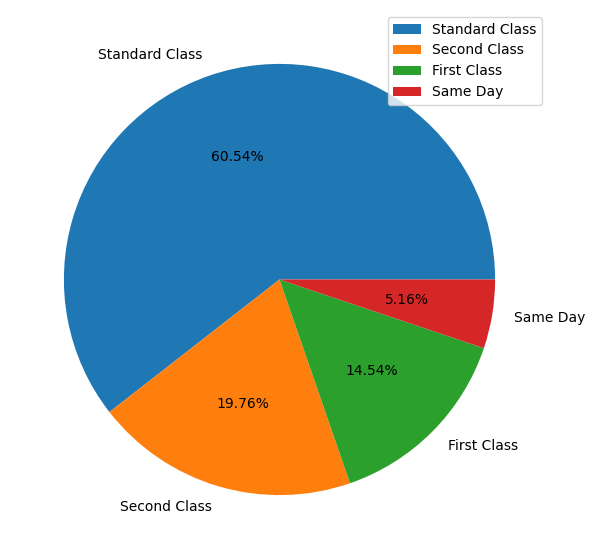

In [13]:
plt.figure(figsize=(9,7))
plt.pie(y,labels=x,autopct="%0.2f%%")
plt.legend(loc=1)
plt.show()

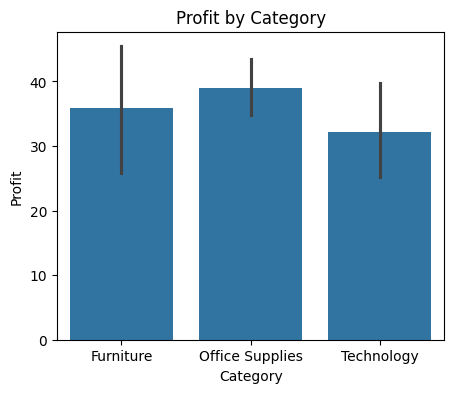

In [29]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Category', y='Profit', data=df)
plt.title('Profit by Category')
plt.show()

# bivariant analysis


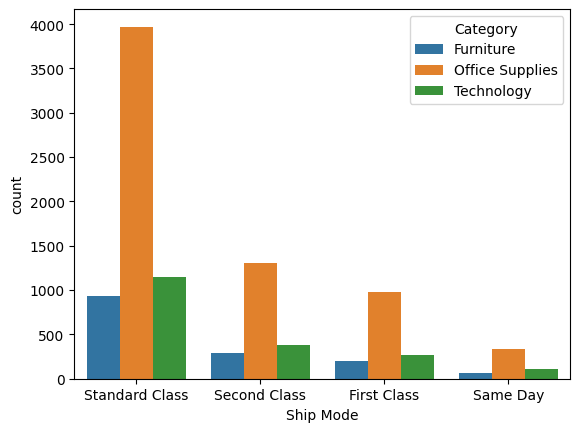

In [60]:

sns.countplot(x=df['Ship Mode'],data=df,hue=df['Category'])
plt.show()

In [ ]:
# renamimg existance column name
df = df.rename(columns={"Segment Section":"Customer Segment"})

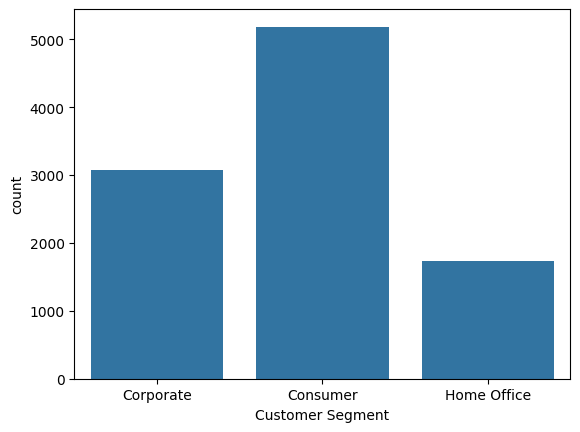

In [62]:
df['Customer Segment'].value_counts()
sns.countplot(x=df['Customer Segment'],data=df)
plt.show()

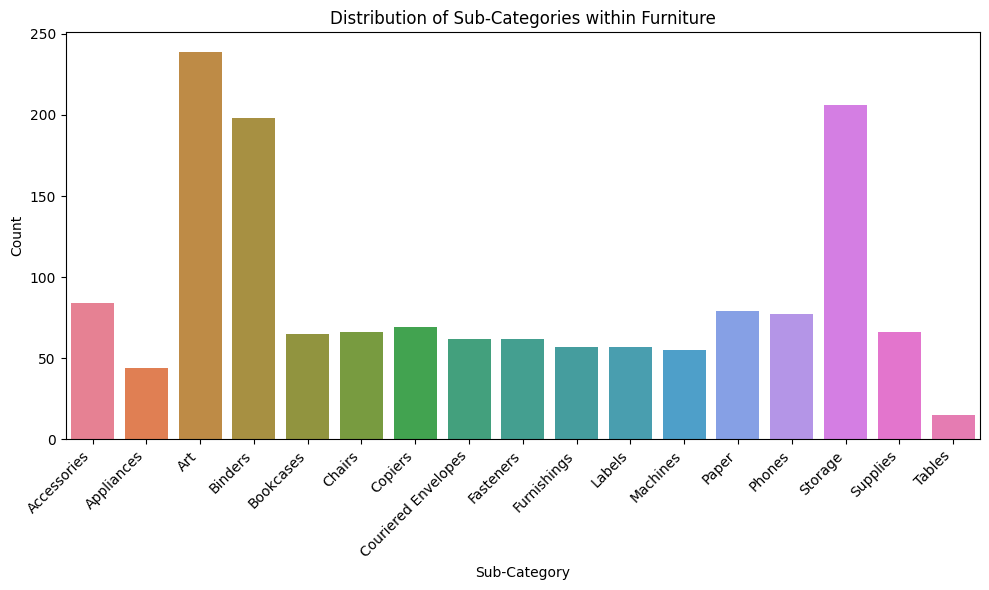

In [30]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visualization
sns.countplot(x='Sub-Category', data=df[df['Category'] == 'Furniture'], hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Furniture')  # Add a title
plt.xlabel('Sub-Category')  # Explicitly label the x-axis
plt.ylabel('Count')  # Explicitly label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


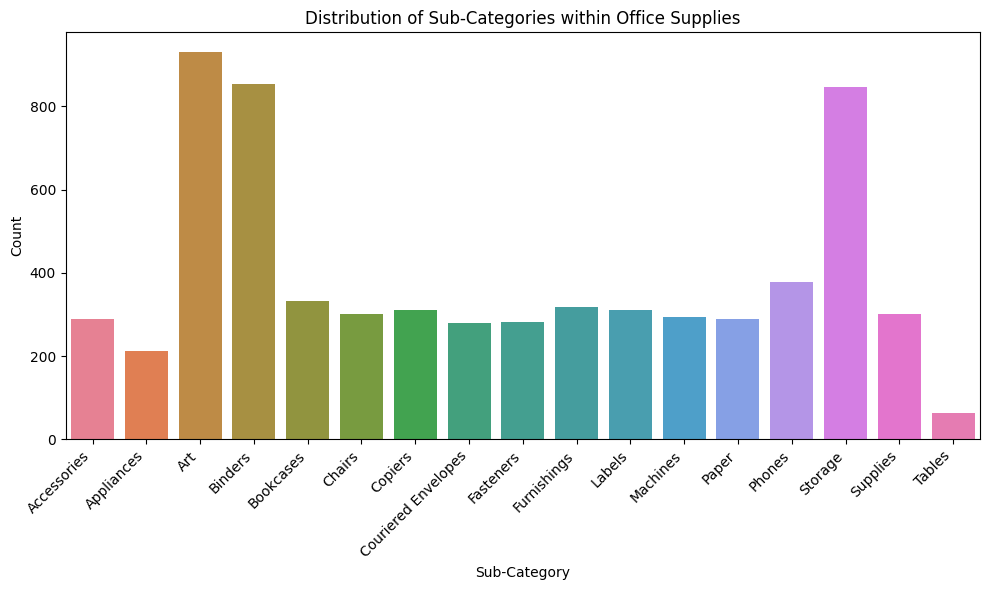

In [33]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visualization
sns.countplot(x='Sub-Category', data=df[df['Category'] == 'Office Supplies'], hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Office Supplies')  # Add a title
plt.xlabel('Sub-Category')  # Explicitly label the x-axis
plt.ylabel('Count')  # Explicitly label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

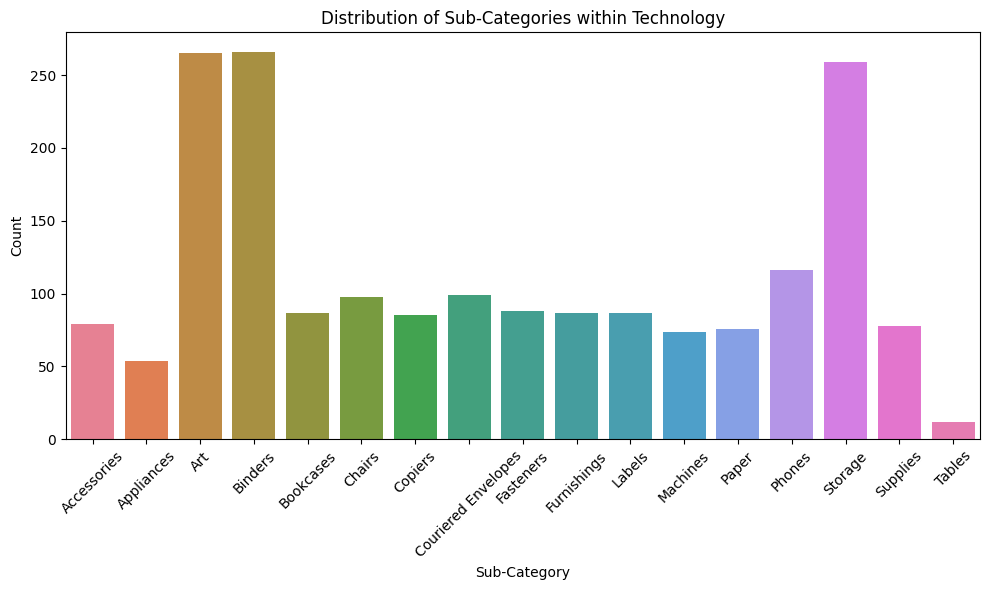

In [34]:

plt.figure(figsize=(10, 6)) 
sns.countplot(x='Sub-Category', data=df[df['Category'] == 'Technology'], hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Technology')
plt.xlabel('Sub-Category') 
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

# Check skewness of data


In [35]:
X=df.iloc[:,:-1]   # seperating profit col from remaining cols
y=df.iloc[:,-1]    # holding only last col i.e. profit col

In [39]:
X.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment Section,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,2,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Furniture,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0
1,5,ES-2018-1311038,2018-02-07,2018-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Furniture,Accessories,"Memorex Memory Card, USB",307.44,3,0.0


In [40]:
y.head(2)

0     0.00
1    73.71
Name: Profit, dtype: float64

In [36]:
from scipy.stats import skew
num_of_columns = X.select_dtypes(include=['int64','float64']).columns
print(num_of_columns)


Index(['Row ID', 'Sales', 'Quantity', 'Discount'], dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_10200\3911418393.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[x])


Skewness is
0.0
Mean is
5000.5
Mode is
0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: Row ID, Length: 10000, dtype: int64
Median is
5000.5


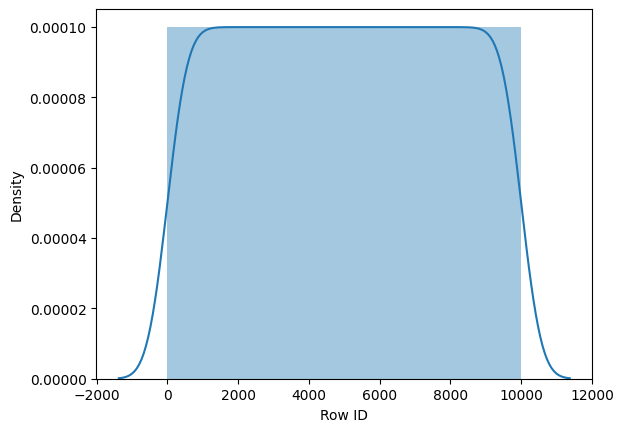

C:\Users\HP\AppData\Local\Temp\ipykernel_10200\3911418393.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[x])


Skewness is
4.712455089581117
Mean is
294.21100615
Mode is
0    27.96
Name: Sales, dtype: float64
Median is
119.355


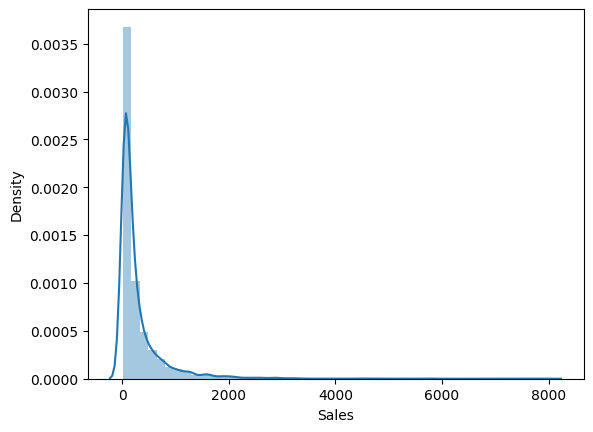

C:\Users\HP\AppData\Local\Temp\ipykernel_10200\3911418393.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[x])


Skewness is
1.2874830334282623
Mean is
3.7773
Mode is
0    2
Name: Quantity, dtype: int64
Median is
3.0


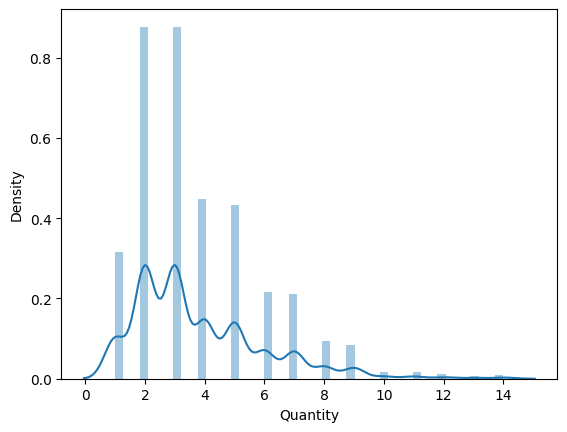

C:\Users\HP\AppData\Local\Temp\ipykernel_10200\3911418393.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[x])


Skewness is
1.6811920766138648
Mean is
0.103105
Mode is
0    0.0
Name: Discount, dtype: float64
Median is
0.0


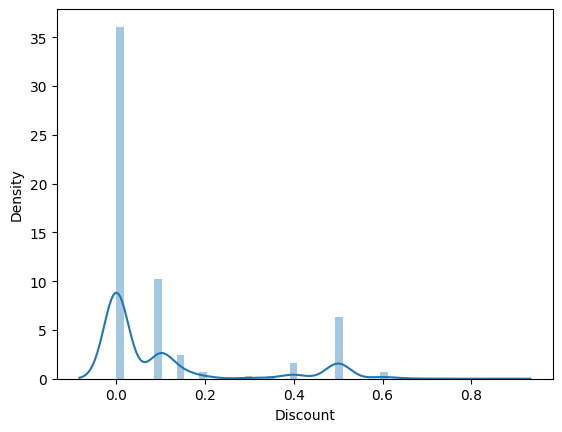

In [ ]:
# plotting distplot for finding skewness

   
for x in X[num_of_columns]:
    sns.distplot(X[x])
    print("Skewness is")
    print(skew(X[x]))
    print("Mean is")
    print(X[x].mean())
    print("Mode is")
    print(X[x].mode())
    print("Median is")
    print(X[x].median())
    plt.show()



# Rules for removing skewness----

1. If the column has the skewness showing good correlation with target, don't remove skewness
2. If the column has the skewness has negative value, don't remove skewness
3. If all the columns are highly skewed, we are unable to remove skewness for each column, so check correlation between feature and target values


In [55]:
# finding correlation
pd.concat([X[num_of_columns],y],axis=1).corr()

,Row ID,Sales,Quantity,Discount,Profit
Row ID,1.000000,-0.005351,-0.021099,0.023176,-0.014931
Sales,-0.005351,1.000000,0.343016,-0.017245,0.477111
Quantity,-0.021099,0.343016,1.000000,0.000939,0.111326
Discount,0.023176,-0.017245,0.000939,1.000000,-0.339153
Profit,-0.014931,0.477111,0.111326,-0.339153,1.000000


In [59]:
# applying log function on Sales
X['Sales']=np.log(X['Sales'])
skew(X['Sales'])

np.float64(0.17139185601644746)

In [ ]:
X['Quantity']=np.log(X['Quantity'])
skew(X['Quantity'])

In [62]:
X['Sales']=np.log(X['Sales'])
skew(X['Sales'])

np.float64(-0.5325719310150112)

In [63]:
X['Discount']=np.log(X['Discount'])
skew(X['Discount'])

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_stats_py.py:1079: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


np.float64(nan)

# perform Feature Enginnearing

In [65]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


In [66]:
df['order year']=df['Order Date'].dt.year

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         10000 non-null  object        
 1   Order Date       10000 non-null  datetime64[ns]
 2   Ship Date        10000 non-null  datetime64[ns]
 3   Ship Mode        10000 non-null  object        
 4   Customer ID      10000 non-null  object        
 5   Customer Name    10000 non-null  object        
 6   Segment Section  10000 non-null  object        
 7   City             10000 non-null  object        
 8   State            10000 non-null  object        
 9   Country          10000 non-null  object        
 10  Region           10000 non-null  object        
 11  Product ID       10000 non-null  object        
 12  Category         10000 non-null  object        
 13  Sub-Category     10000 non-null  object        
 14  Product Name     10000 non-null  object

In [68]:
df['order year'].value_counts()

order year
2018    3528
2017    2577
2016    2242
2015    1653
Name: count, dtype: int64

<Axes: xlabel='order year', ylabel='count'>

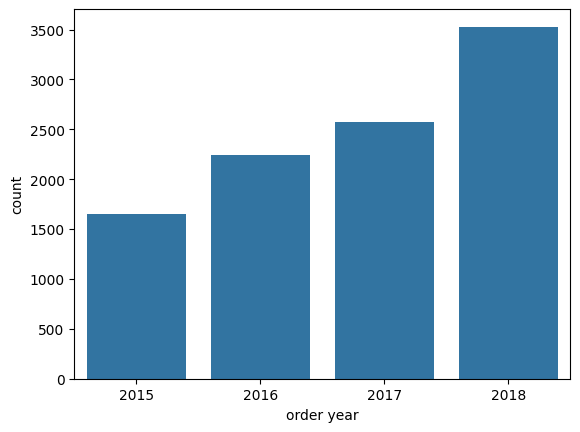

In [69]:
sns.countplot(x=df['order year'],data=df)

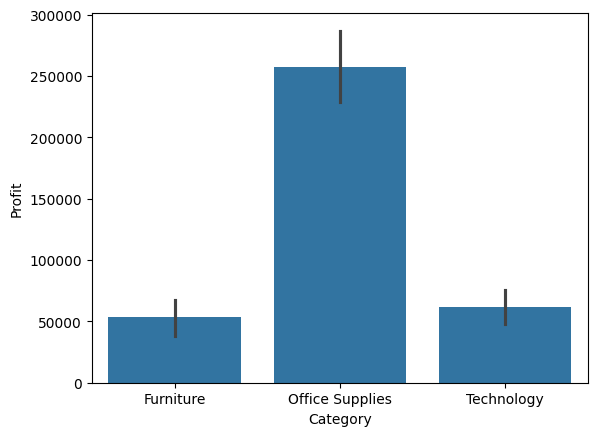

In [70]:
sns.barplot(x=df['Category'],y=df['Profit'],data=df,estimator='sum')
plt.show()

In [71]:
df['State'].value_counts()[:5]

State
England                       1499
Ile-de-France                  981
North Rhine-Westphalia         719
Provence-Alpes-Côte d'Azur     390
Auvergne-Rhône-Alpes           256
Name: count, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         10000 non-null  object        
 1   Order Date       10000 non-null  datetime64[ns]
 2   Ship Date        10000 non-null  datetime64[ns]
 3   Ship Mode        10000 non-null  object        
 4   Customer ID      10000 non-null  object        
 5   Customer Name    10000 non-null  object        
 6   Segment Section  10000 non-null  object        
 7   City             10000 non-null  object        
 8   State            10000 non-null  object        
 9   Country          10000 non-null  object        
 10  Region           10000 non-null  object        
 11  Product ID       10000 non-null  object        
 12  Category         10000 non-null  object        
 13  Sub-Category     10000 non-null  object        
 14  Product Name     10000 non-null  object

# Handling categorical data
1. The process of converting categorical data into numbers are called encoding
use label encoding

In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df:
    df[i]=encoder.fit_transform(df[i])
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment Section,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order year
0,2507,953,1046,3,51,2,1,538,41,14,1,1544,0,0,1550,4823,6,0,1888,3
1,2507,953,1046,3,51,2,1,538,41,14,1,1540,0,0,1205,4405,2,0,4212,3
2,2101,639,705,3,421,435,0,915,1,4,0,1547,0,0,255,5608,5,0,1888,2
3,4413,1028,1126,2,450,435,2,637,68,7,2,1510,0,0,1206,630,0,0,1942,3
4,3182,1149,1254,3,63,49,0,459,81,5,0,1486,0,0,257,3522,4,0,3350,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2060,748,823,3,143,167,0,307,96,14,1,379,2,16,1165,5912,1,0,5456,2
9996,3674,274,300,3,670,672,0,724,6,11,2,351,2,16,234,5668,1,9,89,0
9997,4143,608,672,3,24,44,0,572,41,14,1,353,2,16,1164,5812,1,1,5420,2
9998,4175,656,722,3,452,458,0,309,79,8,0,355,2,16,243,4423,1,11,42,2


In [75]:
# plt.boxplot(data=X,x=y,y=df['Sales'])
# plt.show()

In [76]:
X=df.iloc[:,:-2]
y=df.iloc[:,-2]


In [77]:
X.shape


(10000, 18)

In [78]:
y.shape

(10000,)

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
from sklearn.linear_model import LinearRegression
Lg=LinearRegression()
Lg.fit(x_train,y_train)

LinearRegression()

In [81]:
y_pred=Lg.predict(x_test)
y_pred

array([2492.21292981, 1723.89900872, 2973.96392765, ..., 2679.02245164,
       2347.80023399, 3406.91399685], shape=(3000,))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 872506.9097468575
R-squared: 0.5265658948637548


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [96]:
from sklearn.metrics import accuracy_score

In [97]:
lg=LogisticRegression()


In [98]:

# Logistic Regression
logreg = LogisticRegression() #increase max_iter if it fails to converge.
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logreg_pred)}")


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.0033333333333333335


In [ ]:
# Support Vector Classifier (SVC)
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
print(f"SVC Accuracy: {accuracy_score(y_test, svc_pred)}")

In [ ]:

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")

In [ ]:

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}")